In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
n = 10

In [3]:
game_board = np.zeros((n,n))
(x,y) = np.random.randint(10,size = 2)
game_board[x,y] = 1

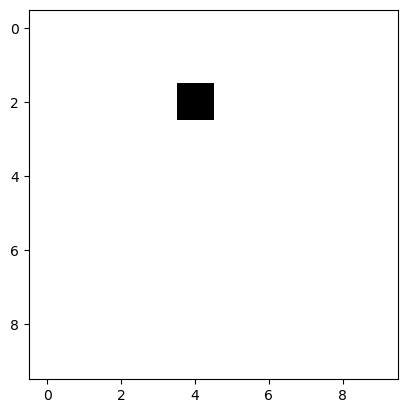

In [4]:
fig, ax = plt.subplots()
cmap = ListedColormap(["white", "black"])
im = ax.imshow(game_board, cmap=cmap)

plt.show()

In [5]:
def draw_diagonales(x,y):
    game_board = np.zeros((n,n))
    game_board[x,y] = 1
    for i in range(1,min(n-x,n-y)):
        game_board[x+i,y+i] = 2
    for i in range(min(x,y),0,-1):
        game_board[x-i,y-i] = 2
    for i in range(max(0,x+y-n+1),x):
        game_board[i,x+y-i] = 2
    for i in range(x+1,min(x+y+1,n)):
        game_board[i,x+y-i] = 2
    for i in range(0,x):
        game_board[i,y] = 2
    for i in range(x+1,n):
        game_board[i,y] = 2
    for j in range(0,y):
        game_board[x,j] = 2
    for j in range(y+1,n):
        game_board[x,j] = 2
    fig, ax = plt.subplots()
    cmap = ListedColormap(["white", "black","red"])
    im = ax.imshow(game_board, cmap=cmap)
    plt.show()

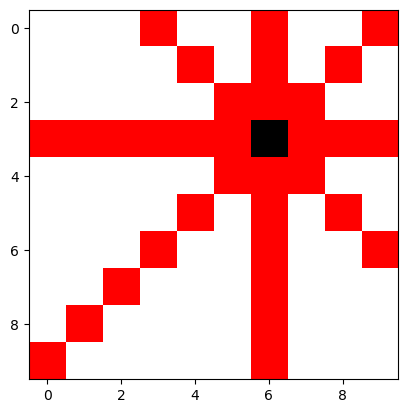

In [6]:
draw_diagonales(3,6)

In [7]:
def is_free(board,x,y):
    n = board.shape[0]
    result = True
    for i in range(1,min(n-x,n-y)):
        if board[x+i,y+i] == 1:
            result=False
    for i in range(min(x,y),0,-1):
        if board[x-i,y-i] == 1:
            result=False
    for i in range(max(0,x+y-n+1),x):
        if board[i,x+y-i] == 1:
            result=False
    for i in range(x+1,min(x+y+1,n)):
        if board[i,x+y-i] == 1:
            result=False
    for i in range(0,x):
        if board[i,y] == 1:
            result=False
    for i in range(x+1,n):
        if board[i,y] == 1:
            result=False
    for j in range(0,y):
        if board[x,j] == 1:
            result=False
    for j in range(y+1,n):
        if board[x,j] == 1:
            result=False
    return result

In [8]:
def chekers_alea(game_board,i):
    n = game_board.shape[0]
    if i > 0:
        J = np.arange(n)
        np.random.shuffle(J)
        for j in J:
            if is_free(game_board,i-1,j):
                game_board[i-1,j] = 1
                chekers_alea(game_board,i-1)
                
    return game_board

In [9]:
game_board = np.zeros((5,5))
np.count_nonzero(chekers_alea(game_board,5))

5